# Google Merchandize Store 

According to the data provided, some of the fields are in JSON format which need to be converted into dataframe formats. We do have a code for it. 

### Important imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import json
from pandas.io.json import json_normalize

In [231]:
import seaborn as sns

In [4]:
pd.__version__

'0.23.4'

In [232]:
# Lets us define the JSON columns first
JSON_cols = [
             'device',
             'geoNetwork', 
             'totals',
             'trafficSource'
            ]

In [233]:
# df1 = pd.read_csv("../train.csv")

In [234]:
# df2 = df1.iloc[:250000,]
# df3 = df1.iloc[:300000,]
# df4 = df1.iloc[:350000,]
# df5 = df1.iloc[:400000,]
# df5 = df1.iloc[:600000,]


In [235]:
# # df2.to_csv("../new_train2.csv", index=False, header=True)
# df3.to_csv("../new_train3.csv", index=False, header=True)
# df4.to_csv("../new_train4.csv", index=False, header=True)
# df5.to_csv("../new_train5.csv", index=False, header=True)

In [236]:
# df2.head()

### Conversion of JSON format

In [237]:
# # Lets us define the JSON columns first
# JSON_cols = [
#              'device',
#              'geoNetwork', 
#              'totals',
#              'trafficSource'
#             ]

In [238]:
# df1.head()

#### A function to extract and convert JSON columns


In [239]:
def load_df(csv_path):
    
    #first we will load the csv path and read the data
    df = pd.read_csv(csv_path,
                    converters= {column: json.loads for column in JSON_cols},
                    dtype= {'fullVisitorId': 'str'} 
                    )
    
    for col in JSON_cols:
        #read the JSON columns into different dataframe
        json_df = json_normalize(df[col])
        json_df.columns = [f"{col}.{subcolumn}" for subcolumn in json_df.columns]
        df = df.drop(col, axis=1).merge(json_df, right_index=True, left_index=True)
    return df

In [240]:
%%time
df = load_df("../new_train4.csv")

Wall time: 1min 11s


In [241]:
df.shape

(350000, 55)

In [299]:
df['totals.transactionRevenue'] = pd.to_numeric(df['totals.transactionRevenue'])

## Data Cleaning


### Find the percentage of nulls

In [242]:
per = sum(df["totals.bounces"].isnull())/len(df["totals.bounces"])
per

0.5034342857142857

In [243]:
def per_calc(data_frame):
    """
    a function to calcuate the percentage of number of nulls
    param: a dataframe
    return: an interger, percentage
    """
    
    #Calculate percentage
    perc = (sum(data_frame.isnull())/len(data_frame))
    
    return perc
   

In [244]:
%%time
jj = df.apply(lambda x: per_calc(x))



Wall time: 4.57 s


In [62]:
jj.index[0]

'channelGrouping'

In [245]:
columns = ["column", "value"]
one = pd.DataFrame(columns=columns, index=range(14))
list1 = []
list2 = []
for i in range(len(jj)):
    if jj[i] > 0:
        list1.append(jj.index[i])
        list2.append(jj[i])

In [246]:
one.column = list1
one.value = list2

In [247]:
one = one.sort_values(axis=0, by=['value'], ascending=False)
one.reset_index(inplace=True, drop = True)

In [248]:
one.head()

,column,value
0,trafficSource.campaignCode,0.999997
1,trafficSource.adContent,0.988611
2,totals.transactionRevenue,0.987394
3,trafficSource.adwordsClickInfo.adNetworkType,0.976909
4,trafficSource.adwordsClickInfo.isVideoAd,0.976909


C:\Users\raghu\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


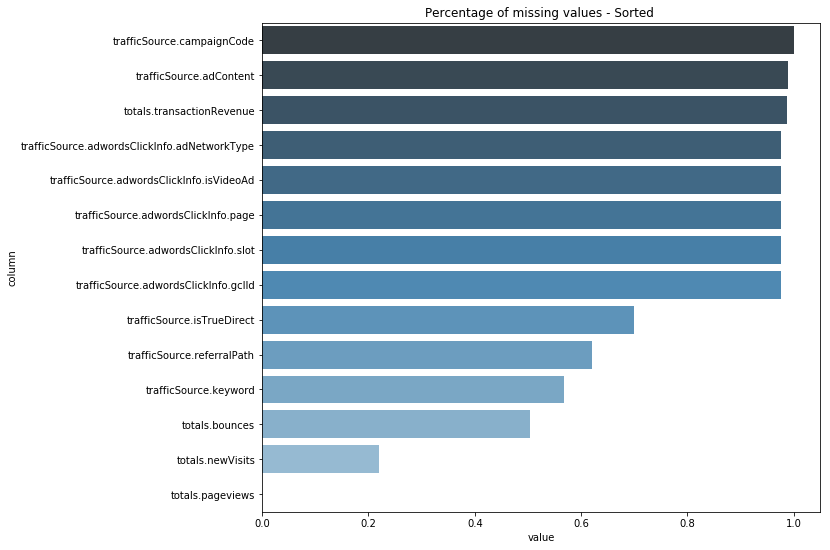

In [249]:
%matplotlib inline
plt.figure(figsize=(10,9))
plt.title("Percentage of missing values - Sorted ")
sns.barplot(x=one.value, y=one.column, palette="Blues_d")

By using this graph, we delete the columns with more than 80% of missing values.  
We will delete those ones and we will leave the transaction Revenue column because we are yet to analyze the column. 


In [29]:
# for f in range(len(one)):
#     if one.column[f] == "totals.transactionRevenue":
#         df1 = df[one.column[f]]
#     elif one.value[f] > 0.8:
#         del df[one.column[f]]
    

In [250]:
df.shape

(350000, 55)

As we see now, that the shape of the dataframe is reduced to (350000, 46) as we deleted the values 9 columns with more than 80% NAs. 

In [251]:
print("Total transactions we have in the dataframe is {}".format(len(df) - sum(df["totals.transactionRevenue"].isnull())))

Total transactions we have in the dataframe is 4412


### Constant Values

In [252]:
num_uniques = df.apply(lambda x: len(x.unique()))

In [253]:
num_unique = num_uniques[num_uniques == 1]

In [254]:
num_unique.index[0]

'socialEngagementType'

In [255]:
for i in range(len(num_unique)):
    f = (num_unique.index[i])
    del df[f]

In [256]:
df.shape

(350000, 36)

Reduced down to 27 columns

### Univariate analysis

In [215]:
# (df["device.browser"].unique())

array(['Chrome', 'Firefox', 'UC Browser', 'Internet Explorer', 'Safari',
       'Edge', 'Opera Mini', 'Opera', 'BlackBerry', 'Safari (in-app)',
       'Coc Coc', 'Mozilla Compatible Agent', 'ADM', 'MRCHROME',
       'Amazon Silk', 'YaBrowser', 'Android Webview', 'Puffin',
       'Nokia Browser', 'Maxthon', 'Nintendo Browser', 'Android Browser',
       'Lunascape', 'IE with Chrome Frame', 'ThumbSniper',
       'LYF_LS_4002_12', 'Mozilla', 'osee2unifiedRelease', 'NokiaE52-1',
       'Iron', '[Use default User-agent string] LIVRENPOCHE', '(not set)',
       'LYF_LS_4002_11', 'M5', 'Android Runtime', 'Apple-iPhone7C2',
       'SeaMonkey', 'Konqueror', 'Seznam', 'Changa 99695759', 'no-ua',
       'MQQBrowser', 'Nichrome', 'HTC802t_TD'], dtype=object)

## Device 

### A function to plot barplots for all the variables 

In [257]:
def barplot_percentage(feature, num = None, rotation = False):
    
    # count
    data = round(100 * df[feature].value_counts()/len(df) )
    # dataframe
    data = data.to_frame().reset_index()
    # head
    data = data.head(num)
    # plot 
    if rotation == True:
        xx = sns.barplot(x= data['index'], y = data[feature], palette="Blues_r")
        xx.set_xticklabels(labels = data['index'], rotation = 50)
        plt.xlabel("Browsers")
        plt.ylabel("Percentage")
    else:
        xx = sns.barplot(y= data['index'],  x= data[feature], palette="Blues_r")
        plt.xlabel('Percentage')
        plt.ylabel('Browsers')
    print(xx)

Axes(0.125,0.125;0.775x0.755)


C:\Users\raghu\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


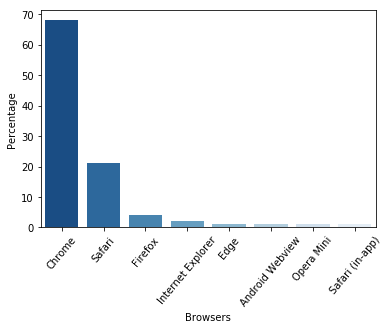

In [258]:
barplot_percentage("device.browser", 8, rotation=True)

### a function for plotting pie charts for categorical variables

In [259]:
def pie_chart(feature):
    
    # counts
    data = df[feature].value_counts()
    
    if len(data) <= 8:


        #define empty lists 
        counts = []
        labels = []

        # iterate through each row to feed values in empty lists
        for i in range(len(data)):
            counts.append(data[i])
            labels.append(data.index[i])

        # pie chart
        plt.title("Pie chart of {}".format(feature))
        plt.pie(x=counts, labels=labels, autopct= "%1.1f%%")
        plt.figure(figsize = (10,10))


In [214]:
### Device category 

In [ ]:
df["totals.transactionRevenue"]

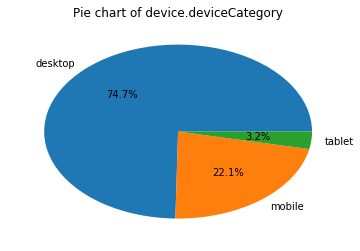

In [213]:
pie_chart("device.deviceCategory")

we want to see how much does each device category contribute towards total revenue

### a function to see the impact of the feature on the transaction revenue

In [310]:
def revenue_impact(feature, palette,  sum_values = True ):
    
    # condition for sum values
    temp = df[df["totals.transactionRevenue"].notnull()]
    if sum_values :
        temp.groupby(by = feature)["totals.transactionRevenue"].sum()
    else:
        temp.groupby(by = feature)["totals.transactionRevenue"].mean()
        
    temp = temp.reset_index().sort_values('totals.transactionRevenue', ascending=False)
    
    temp = temp[temp['totals.transactionRevenue'] > 0]
    plt.figure(figsize=(9,9))
    plt.title("Revenue impact of the {} on transaction revenue".format(feature))
    ax = sns.barplot(y=temp[feature], x= temp['totals.transactionRevenue'], orient='h', palette=palette)

C:\Users\raghu\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


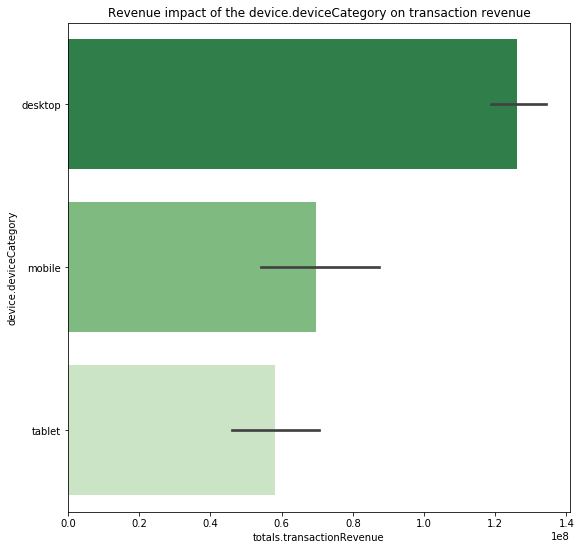

In [312]:
revenue_impact(feature='device.deviceCategory', palette="Greens_r", sum_values=False)

C:\Users\raghu\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


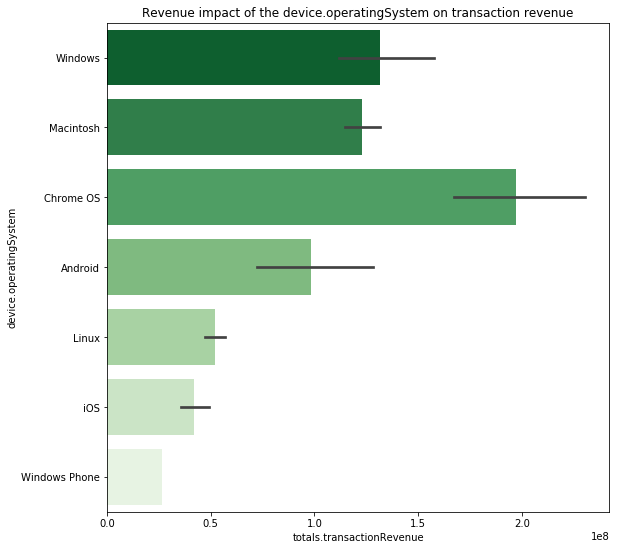

In [317]:
revenue_impact(feature='device.operatingSystem', palette="Greens_r", sum_values=False)

C:\Users\raghu\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


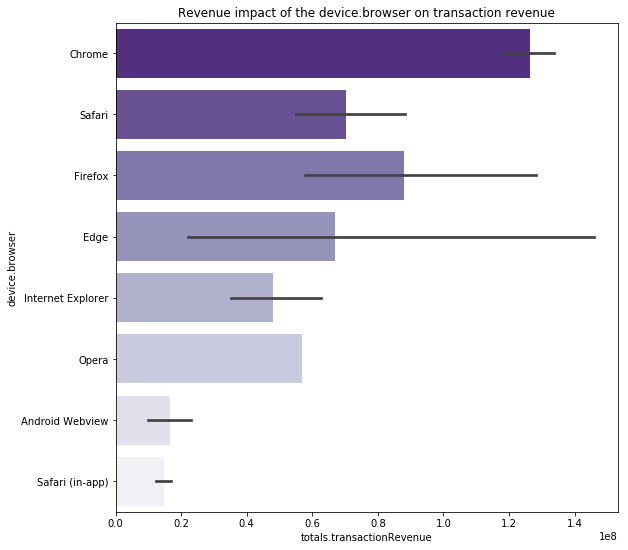

In [320]:
revenue_impact(feature='device.browser', palette="Purples_r", sum_values=False)

In [314]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.bounces', 'totals.hits',
       'totals.newVisits', 'totals.pageviews', 'totals.transactionRevenue',
       'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.campaignCode', 'trafficSource.isTrueDirect',
       'trafficSource.keyword', 'trafficSource.medium',
       'trafficSource.referralPath', 'trafficSource.source'],
      dty

### Totals

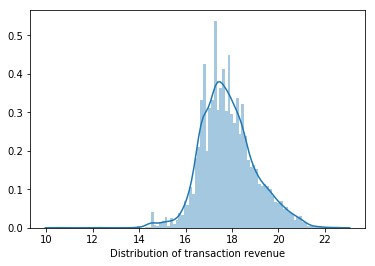

In [326]:
sns.distplot(a = np.log(new["totals.transactionRevenue"]), kde = True, bins = 100, axlabel= "Distribution of transaction revenue")

In [325]:
np.log(new['totals.transactionRevenue'])

752       17.449406
753       19.541283
799       18.035459
802       17.083177
859       20.168401
866       15.941358
893       19.796243
910       16.996892
922       17.384480
925       17.373142
930       18.216114
942       20.118715
971       17.971891
974       18.580586
976       17.593087
999       17.355890
1000      17.381940
1008      19.641599
1020      17.332118
1022      20.269923
1026      18.452567
1027      19.537362
1037      15.454507
1041      18.324720
1054      16.175421
1055      17.061223
1056      19.641422
2774      20.202238
3161      17.617495
3268      17.229624
            ...    
348247    18.286806
348252    17.370573
348253    17.686086
348255    17.562187
348261    17.549841
348262    18.489927
348265    18.246089
348266    16.759423
348271    18.459613
348275    19.272540
348276    18.252617
348279    17.229624
348291    14.503645
348292    16.010510
348295    17.053404
348299    16.898338
348306    19.546616
348307    18.466036
348309    17.175191


In [328]:
hs = {'name':'Nick'}
li = {1 : [1,2,7]}

In [329]:
list1 = [1, 4,5,6]

In [330]:
list1.append(88)

In [332]:
list1.append(hs)

In [333]:
list1

[1, 4, 5, 6, 88, {'name': 'Nick'}]